In [ ]:
def timing_bars(run_timing_list, motion_thresh, BOLD_window, subjid, timepoint):
    from nipype import config, logging
    config.enable_debug_mode()
    logging.update_logging(config)
    
    from pandas import DataFrame,Series,read_table,concat
    from os.path import abspath
    
    motion = '/Users/catcamacho/Box/LNCD_rewards_connectivity/proc/preprocessing/motion_params/%d_t%d/allmotion.txt' % (subjid,timepoint)
    # Import and organize motion data
    motion_df = read_table(motion,delim_whitespace=True,header=None)
    mean_translation = motion_df[[3,4,5]].mean(axis=1)
    
    # Create full task dataframe
    run_timing_list = sorted(run_timing_list)
    dfs = [ read_table(i,delim_whitespace=True) for i in run_timing_list ]
    k=1
    for df in dfs:
        df.loc[:,'runNum'] = Series(k, index = df.index)
        df.loc[:,'time_hyp'] = (k-1)*453 + df.loc[:,'time_hyp']
        df.loc[:,'trial'] = (k*100) + df.loc[:,'trial']
        k = k+1
    df_full = concat(dfs,ignore_index=True)
    df_full = df_full.sort(['runNum','time_hyp'], ascending=[1,1])
    df_full.loc[:,'motion'] = mean_translation
    df_full.loc[:,'subjid'] = Series(subjid,index=df_full.index)
    df_full.loc[:,'timepoint'] = Series(timepoint,index=df_full.index)
    
    # Sort out trials that are complete
    df_complete = df_full[df_full.loc[:,'catch']==0]
    
    # Add additional label to the trials with high motion
    df_complete.loc[:,'mot_cat'] = Series('low',index=df_responded.index)
    for index, row in df_complete.iterrows():
        hrf_length = index+BOLD_window
        trial_motion = df_full.iloc[index:hrf_length,8]
        excess_vols = (trial_motion >= motion_thresh) + (trial_motion <= (-1*motion_thresh))
        if sum(excess_vols) >= 4:
            df_complete.loc[index,'mot_cat'] = 'high'
            
    df_complete.to_csv('cleaned_behavioral_data.csv')
    all_trial_data = abspath('cleaned_behavioral_data.csv')
    
    overall_stats = DataFrame()
    
    return(subject_level_files)

In [ ]:
from pandas import DataFrame, Series

analysis_home = '/Users/catcamacho/Box/LNCD_rewards_connectivity'
#analysis_home = '/Volumes/Zeus/Cat'
behavior_dir = analysis_home + '/proc/behavior'

#pull subject info to iter over
#subject_info = DataFrame.from_csv(analysis_home + '/misc/subjs.csv')
#subjects_list = subject_info['SubjID'].tolist()
#timepoints = subject_info['Timepoint'].tolist()

subjects_list = [10766]
timepoints = [1]
motion_thresh = 0.9
BOLD_window = 8

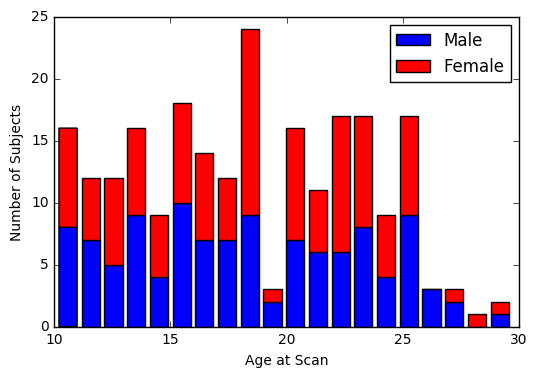

In [6]:
import matplotlib.pyplot as plt 
import numpy as np
from pandas import DataFrame, Series
analysis_home = '/Users/catcamacho/Box/LNCD_rewards_connectivity'
subject_info = DataFrame.read_excel(analysis_home + '/doc/RewardsTracker.xlsx')
age = np.array([20.78, 25.55, 15.4, 13.33, 15.69, 16.09, 15.56, 13.11, 20.11, 20.45, 15.59, 23.65, 16.6, 10.49, 16.25, 16.32, 20.07, 17.56, 18.72, 18.93, 23.62, 22.17, 16.86, 26.64, 18.09, 23.55, 11.41, 20.43, 17.03, 22.91, 17.09, 17.53, 14.81, 18.8, 18.96, 12.65, 14.85, 10.76, 18.9, 15.65, 18.85, 13.87, 11.06, 10.57, 10.11, 11.75, 12.88, 14.15, 15.92, 15.78, 11.53, 17.91, 13.53, 13.97, 17.45, 12.47, 14.85, 17.46, 14.24, 18.31, 17.23, 16.16, 15.69, 16.1, 18.17, 15.56, 17.13, 15.41, 14.89, 11.24, 15.15, 18.6, 17.44, 13.21, 18.72, 15.91, 10.72, 17.49, 12.91, 11.12, 17.96, 12.12, 18.39, 18.57, 18.49, 18.9, 18.33, 11.03, 12.71, 13.68, 10.93, 13.44, 11.77, 12.41, 18.86, 10.75, 12.35, 18.88, 11.69, 18.74, 11.15, 15.88, 14.63, 12.23, 11.76, 17.84, 18.54, 13.65, 10.46, 11.28, 16.74, 10.95, 11.7, 13.94, 12.51, 12.16, 16.05, 10.88, 13.85, 10.16, 10.13, 12.3, 13.05, 13.38, 16.67, 15.07, 18.65, 15.04, 10.92, 13.84, 14.77, 16.94, 13.81, 18.11, 18.95, 15.6, 18.9, 11.97, 18.86, 14.22, 16.21, 18.32, 15.97, 16.29, 10.53, 16.76, 15.3, 13.14, 24.33, 21.91, 20.62, 21.74, 21.4, 20.67, 25.03, 22.15, 22.2, 22.07, 25.72, 22.04, 21.68, 22.68, 22.4, 21.52, 21.76, 25.13, 20.65, 20.39, 23.71, 21.96, 24.03, 20.91, 21.84, 23.62, 22.09, 22.37, 23.34, 25.17, 24.41, 22.61, 23.8, 25.74, 25.73, 23.49, 24.28, 21.08, 25.72, 21.61, 22.77, 22.44, 21.7, 23.26, 23.16, 20.7, 21.45, 20.75, 23.43, 20.69, 20.48, 25.44, 22.61, 24.84, 25.13, 24.67, 23.62, 23.19, 23.4, 25.94, 23.64, 24.26, 25.6, 25.17, 24.22, 21.62, 24.82, 22.06, 28.33, 20.82, 26.81, 25.28, 27.27, 29.65, 28.82, 23.81, 26.93, 24.88, 24.94, 20.07, 23.35, 25.86, 20.51, 23.53])
sex = np.array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
male_age = age[sex==1]
female_age = age[sex==0]

fig1 = plt.hist([male_age, female_age], bins=20, stacked=True, align='mid', color=['blue','red'], label=['Male','Female'])
plt.xlabel('Age at Scan')
plt.ylabel('Number of Subjects')
plt.legend()
#plt.savefig('agehist.svg')
plt.show()
